IMPORTING THE DEPENDENCIES

In [98]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

Loading MGT dataset to pandas Dataframe

In [99]:
 dataset = pd.read_csv('/content/MGTDataset.csv')

Printing the first 5 rows of the dataset

In [100]:
dataset.head()

,fLength,fwidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


DATA PREPROCESSING

CHECKING FOR MISSING VALUES

In [101]:
dataset.isnull().sum()

fLength     0
fwidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

Number of rows and Columns in this dataset

In [102]:
dataset.shape

(19020, 11)

CONVERTING THE LAST COLUMN

In [103]:
dataset['class'] = dataset['class'].apply({'g' : 1, 'h' : 0}.get)


Printing the first 5 rows

In [104]:
dataset.head()

,fLength,fwidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


Data Description

In [105]:
dataset.describe()

,fLength,fwidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026,0.648370
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787,0.477492
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600,0.000000
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250,0.000000
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450,1.000000
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825,1.000000
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000,1.000000


PLOTTING

<Axes: >

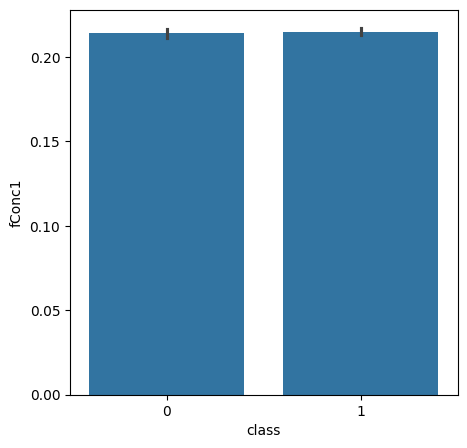

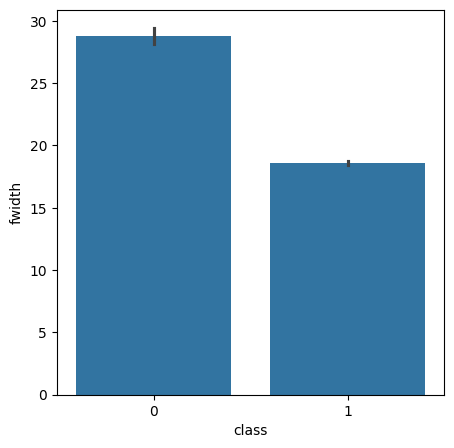

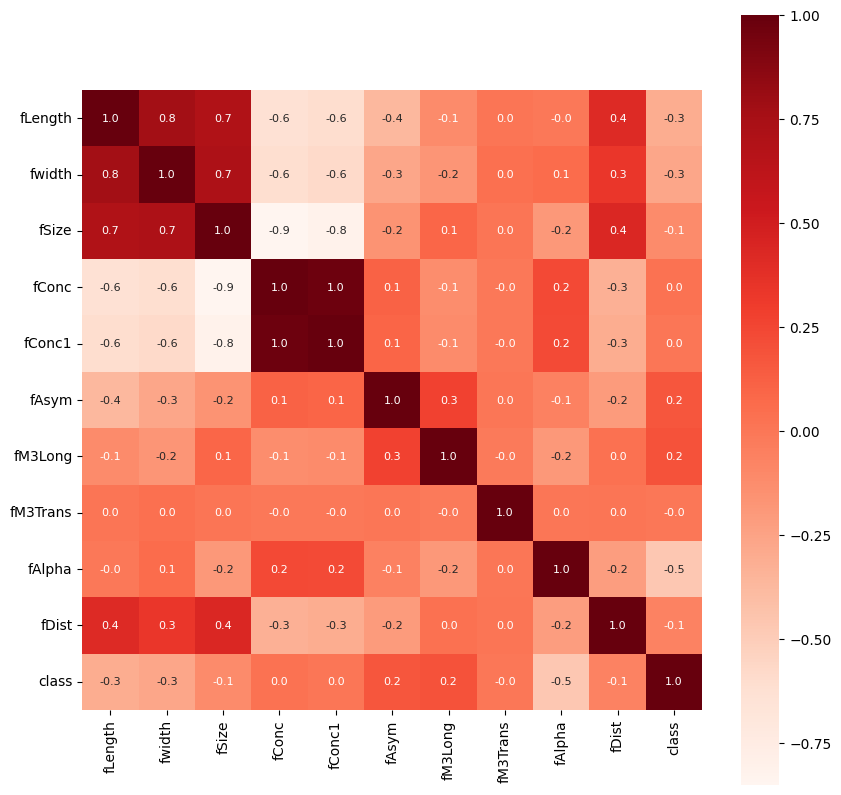

In [106]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='class', y = 'fConc1', data = dataset)
plot = plt.figure(figsize=(5,5))
sns.barplot(x='class', y = 'fwidth', data = dataset)
correlation = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Reds')

DISTRIBUTION OF VALUES

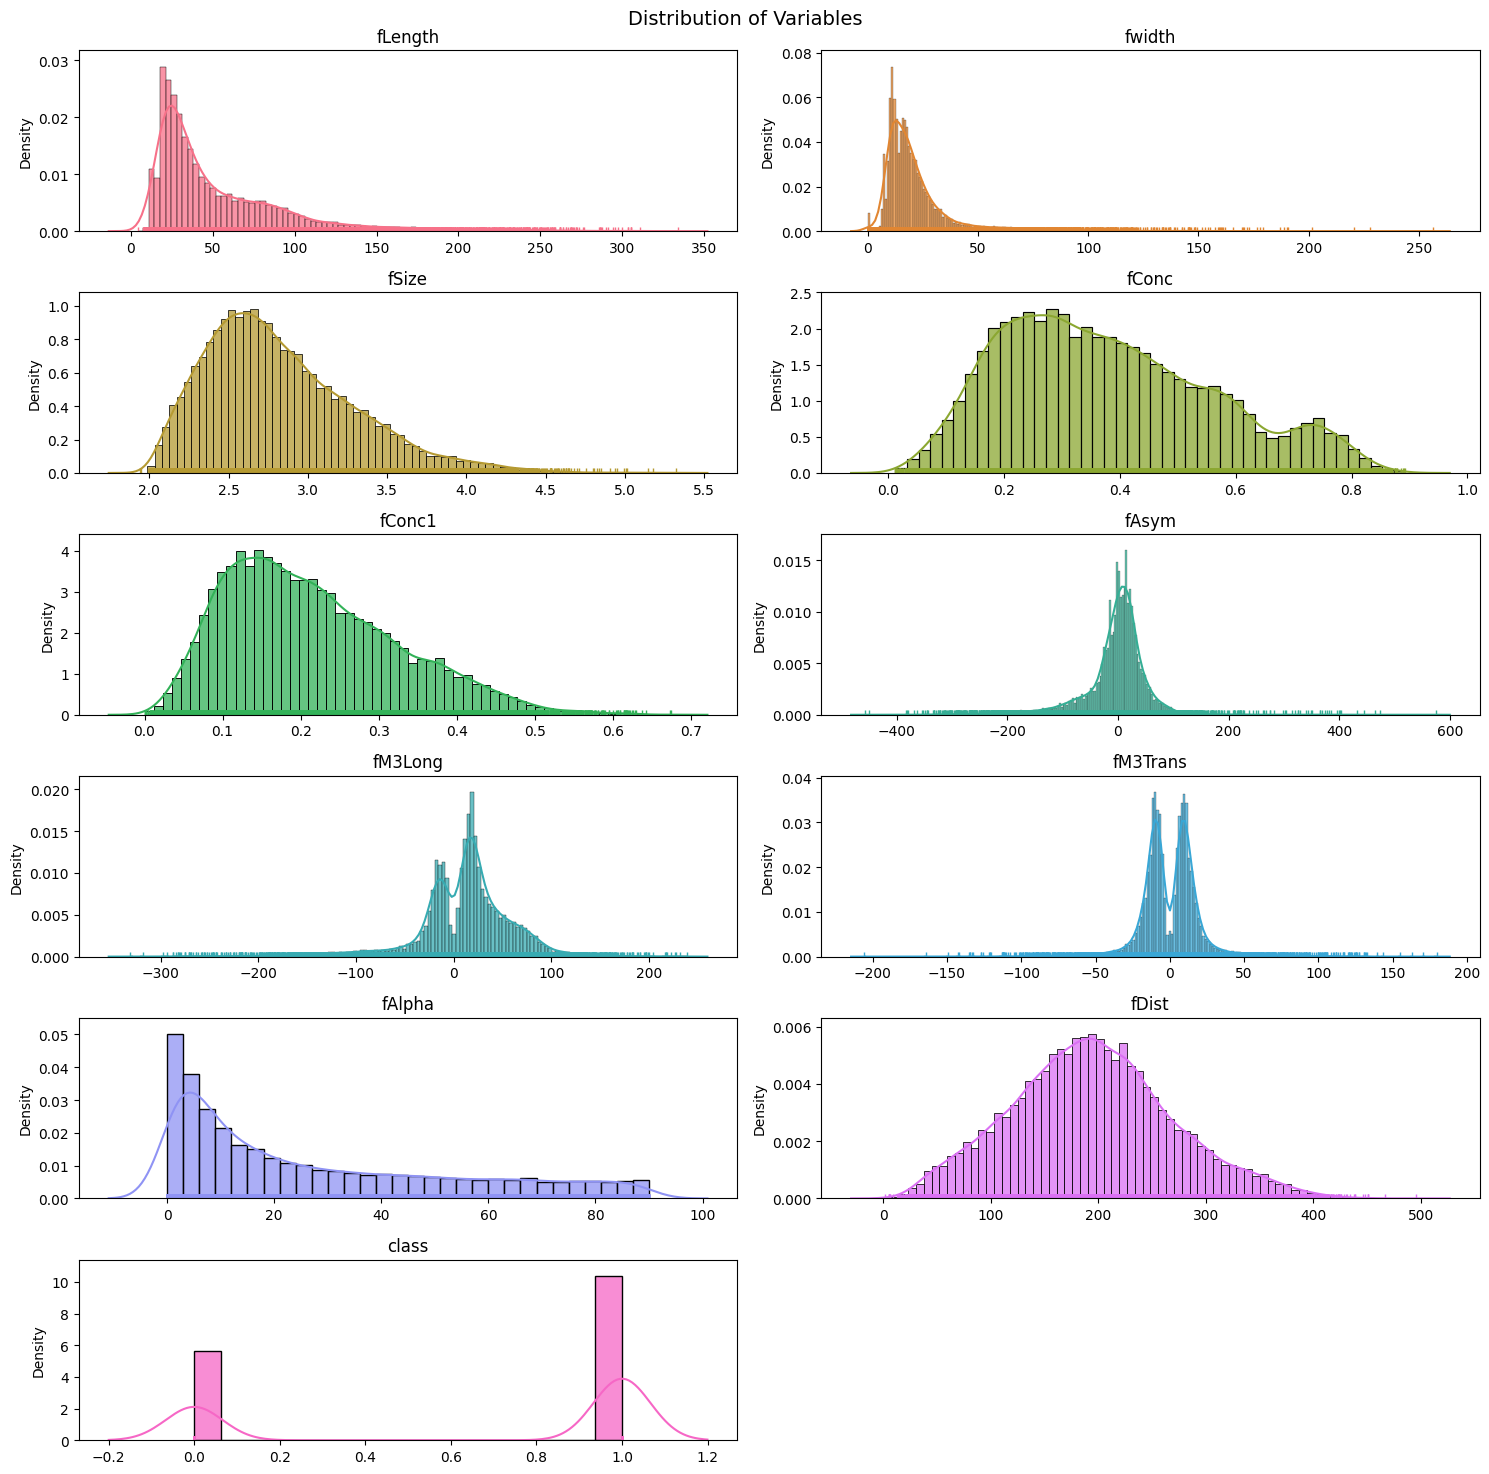

In [107]:
cols = dataset.columns[:11]
colors = sns.color_palette('husl', len(cols))

fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(15, 15))
axs = axs.flatten()

for i in range (11):
    col = cols[i]
    sns.kdeplot(dataset[col], ax=axs[i], color=colors[i])  # kdeplot = kernel density estimation plot
    sns.histplot(dataset[col], ax=axs[i], color=colors[i], stat='density')  # histplot = histogram plot
    sns.rugplot(dataset[col], ax=axs[i],
                color=colors[i])

    axs[i].set_xlabel('')  # remove x label to avoid redundancy
    axs[i].set_title(col)
    plt.tight_layout()

fig.suptitle("Distribution of Variables", fontsize=14)
fig.delaxes(axs[-1])
fig.tight_layout()

SPLITING THE DATASET

In [108]:
Y = dataset['class']
X = dataset.drop(columns='class')

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,train_size=0.75)
X_train.head()


,fLength,fwidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
9168,25.9857,18.4585,2.5231,0.3538,0.1814,-25.4800,-6.2044,15.2170,56.1948,190.330
8383,37.5265,21.7254,3.0988,0.2087,0.1087,37.1436,8.3872,8.8451,7.3742,141.914
3980,58.8047,33.6055,3.5673,0.1798,0.0955,45.2378,56.4516,26.5973,4.6870,134.654
8011,81.8663,22.5846,3.0037,0.2062,0.1076,-98.9128,56.3823,15.6502,4.4916,242.715
9018,57.4159,17.4763,2.8344,0.2738,0.1428,22.4771,60.2797,12.2177,14.6429,202.665


STANDARDISATION

In [109]:
X_train_array = np.asarray(X_train)
X_test_array = np.asarray(X_test)
sc=StandardScaler() # Machine Instance
train_scaled=sc.fit_transform(X_train_array) # Scaling the train set
test_scaled=sc.transform(X_test_array) # Scaling the test set
train_scaled

array([[-0.63804528, -0.20286301, -0.63613186, ...,  0.71422492,
         1.08910714, -0.04395788],
       [-0.37000069, -0.02764681,  0.58246569, ...,  0.41054104,
        -0.77745557, -0.69193922],
       [ 0.12420305,  0.60952788,  1.57415051, ...,  1.25660847,
        -0.88019554, -0.7891043 ],
       ...,
       [-0.40943581, -0.2867087 ,  0.11975   , ...,  0.52777   ,
        -1.04134804,  0.55212178],
       [-0.77477803, -0.50275094, -0.88463516, ...,  0.3643062 ,
        -0.2306917 ,  0.24737676],
       [-0.60815597, -0.51638465, -0.20072189, ..., -0.48288601,
        -0.91452886, -0.10952423]])

SUPPORT VECTOR MACHINE

In [110]:
model = SVC()
model.fit(train_scaled,Y_train)

predict_train=model.predict(train_scaled)
predict_test=model.predict(test_scaled)

acc_train=accuracy_score(Y_train, predict_train)
acc_test=accuracy_score(Y_test, predict_test)

print('Train data Accuracy Prediction:',round(acc_train*100,2),'%')
print('Test data Accuracy Prediction:',round(acc_test*100,2),'%')
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, predict_test))
print("\nClassification Report:\n", classification_report(Y_test, predict_test))

Train data Accuracy Prediction: 87.25 %
Test data Accuracy Prediction: 87.02 %

Confusion Matrix:
 [[1187  489]
 [ 128 2951]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.79      1676
           1       0.86      0.96      0.91      3079

    accuracy                           0.87      4755
   macro avg       0.88      0.83      0.85      4755
weighted avg       0.87      0.87      0.87      4755



K-NEIGHBOUR CLASSIFIER

In [111]:
model = KNeighborsClassifier()
model.fit(train_scaled,Y_train)

predict_train=model.predict(train_scaled)
predict_test=model.predict(test_scaled)

acc_train=accuracy_score(Y_train, predict_train)
acc_test=accuracy_score(Y_test, predict_test)

print('Train data Accuracy Prediction:',round(acc_train*100,2),'%')
print('Test data Accuracy Prediction:',round(acc_test*100,2),'%')
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, predict_test))
print("\nClassification Report:\n", classification_report(Y_test, predict_test))

Train data Accuracy Prediction: 88.15 %
Test data Accuracy Prediction: 83.18 %

Confusion Matrix:
 [[1063  613]
 [ 187 2892]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.63      0.73      1676
           1       0.83      0.94      0.88      3079

    accuracy                           0.83      4755
   macro avg       0.84      0.79      0.80      4755
weighted avg       0.83      0.83      0.82      4755



LOGISTIC REGRESSION

In [112]:
model=LogisticRegression()
model.fit(train_scaled,Y_train)

predict_train=model.predict(train_scaled)
predict_test=model.predict(test_scaled)

acc_train=accuracy_score(Y_train, predict_train)
acc_test=accuracy_score(Y_test, predict_test)

print('Train data Accuracy Prediction:',round(acc_train*100,2),'%')
print('Test data Accuracy Prediction:',round(acc_test*100,2),'%')
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, predict_test))
print("\nClassification Report:\n", classification_report(Y_test, predict_test))

Train data Accuracy Prediction: 79.09 %
Test data Accuracy Prediction: 79.12 %

Confusion Matrix:
 [[ 985  691]
 [ 302 2777]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.59      0.66      1676
           1       0.80      0.90      0.85      3079

    accuracy                           0.79      4755
   macro avg       0.78      0.74      0.76      4755
weighted avg       0.79      0.79      0.78      4755



RANDOM FOREST CLASSIFIER

In [113]:
model=RandomForestClassifier()
model.fit(train_scaled,Y_train)

predict_train=model.predict(train_scaled)
predict_test=model.predict(test_scaled)

acc_train=accuracy_score(Y_train, predict_train)
acc_test=accuracy_score(Y_test, predict_test)

print('Train data Accuracy Prediction:',round(acc_train*100,2),'%')
print('Test data Accuracy Prediction:',round(acc_test*100,2),'%')
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, predict_test))
print("\nClassification Report:\n", classification_report(Y_test, predict_test))

Train data Accuracy Prediction: 99.99 %
Test data Accuracy Prediction: 88.29 %

Confusion Matrix:
 [[1292  384]
 [ 173 2906]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82      1676
           1       0.88      0.94      0.91      3079

    accuracy                           0.88      4755
   macro avg       0.88      0.86      0.87      4755
weighted avg       0.88      0.88      0.88      4755



NAIVE BAYES CLASSIFIER

In [114]:
# Create a Naive Bayes classifier model
model = GaussianNB()

# Train the model on the scaled training data and target variable
model.fit(train_scaled, Y_train)

# Predict the class labels for the training and test data using the trained model
predict_train = model.predict(train_scaled)
predict_test = model.predict(test_scaled)

# Calculate accuracy scores for both training and test data
acc_train = accuracy_score(Y_train, predict_train)
acc_test = accuracy_score(Y_test, predict_test)

# Print the accuracy scores with rounding to two decimal places
print('Train data Accuracy Prediction:', round(acc_train * 100, 2), '%')
print('Test data Accuracy Prediction:', round(acc_test * 100, 2), '%')

# Print the confusion matrix to evaluate model performance on different classes
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, predict_test))

# Print the classification report for detailed performance metrics (precision, recall, F1-score)
print("\nClassification Report:\n", classification_report(Y_test, predict_test))


Train data Accuracy Prediction: 72.78 %
Test data Accuracy Prediction: 72.24 %

Confusion Matrix:
 [[ 613 1063]
 [ 257 2822]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.37      0.48      1676
           1       0.73      0.92      0.81      3079

    accuracy                           0.72      4755
   macro avg       0.72      0.64      0.65      4755
weighted avg       0.72      0.72      0.69      4755



DECISION TREE

In [115]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(train_scaled,Y_train)

predict_train=model.predict(train_scaled)
predict_test=model.predict(test_scaled)

acc_train=accuracy_score(Y_train, predict_train)
acc_test=accuracy_score(Y_test, predict_test)

print('Train data Accuracy Prediction:',round(acc_train*100,2),'%')
print('Test data Accuracy Prediction:',round(acc_test*100,2),'%')
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, predict_test))
print("\nClassification Report:\n", classification_report(Y_test, predict_test))

Train data Accuracy Prediction: 100.0 %
Test data Accuracy Prediction: 81.14 %

Confusion Matrix:
 [[1234  442]
 [ 455 2624]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.73      1676
           1       0.86      0.85      0.85      3079

    accuracy                           0.81      4755
   macro avg       0.79      0.79      0.79      4755
weighted avg       0.81      0.81      0.81      4755



ACCURACY COMPARISON OF THE MODELS

<ipython-input-116-2f487a62c9d3>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20')


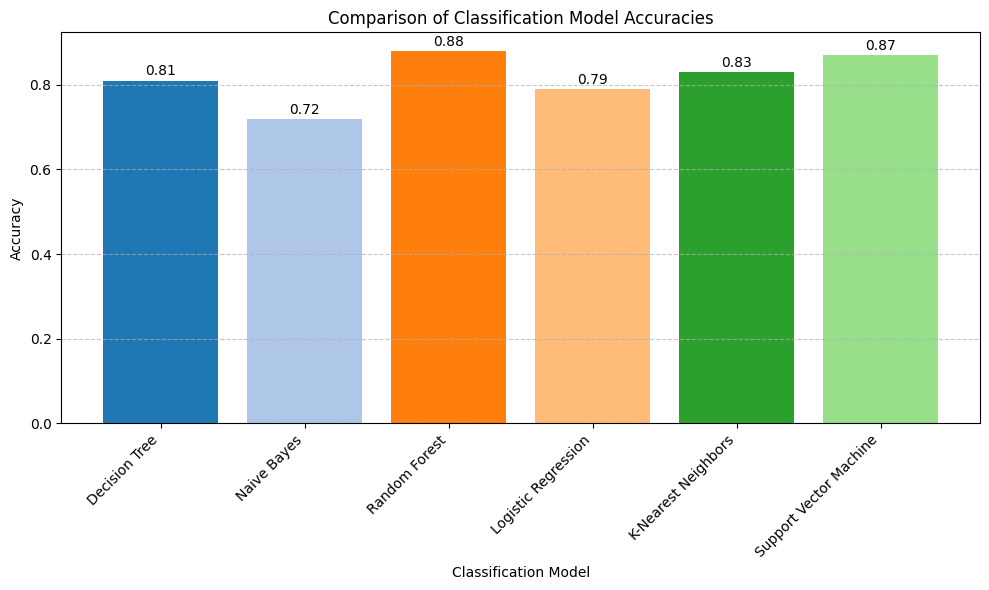

In [116]:
# Sample accuracies (replace with your actual results)
accuracies = [
    ('Decision Tree', 0.81),
    ('Naive Bayes', 0.72),
    ('Random Forest', 0.88),
    ('Logistic Regression', 0.79),
    ('K-Nearest Neighbors', 0.83),
    ('Support Vector Machine', 0.87),
]

# Extract classifier names and accuracies
classifier_names = [accuracy[0] for accuracy in accuracies]
accuracies = [accuracy[1] for accuracy in accuracies]

# Generate colormap and colors for bars
color_map = plt.cm.get_cmap('tab20')
colors = color_map(np.arange(len(accuracies)) % color_map.N)

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(classifier_names, accuracies, color=colors)

# Customize the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Classification Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Model Accuracies')

# Add data labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, round(yval, 3), ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add faint gridlines for better readability
plt.show()



MAKING A PREDICTIVE SYSTEM

In [117]:

input_data =(31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data=sc.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('Hadron Background')
else:
  print('Gamma Signal')

[1]
Gamma Signal
